# **Визуализация в `matplotlib`**

**Документация**: https://matplotlib.org/stable/contents.html

Шпаргалка по визуализации: https://www.data-to-viz.com/
- Какими графиками можно визуализировать ваши признаки 
- Объяснение каждого графика
- Примеры, как нарисовать такой график в `seaborn` с подробным разбором аргументов
- Даже примерно показывают как выглядят ваши признаки
- Настоятельно советую хотя бы посмотреть!

In [1]:
# если не установлена библиотека - раскомментируйте строчку ниже
# !pip install matplotlib -q

Импортируем библиотеку `matplotlib`:

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## **1. Preliminary**

### *1.1 Зачем?*

*Зачем нам вообще нужна библиотека, если можно строить графики и через `.plot()`?*

1. **Гибкая кастомизация**: Метод `.plot()` ограничен базовыми настройками (цвет, размер, заголовки), но библиотеки вроде *matplotlib* и *seaborn* позволяют детально настраивать шрифты, стили, аннотации и создавать более красивые графики
2. **Расширенный набор графиков**: `.plot()` поддерживает только простые типы графиков (линейный, гистограммы, ...), которых для НЭ хватает. Библиотеки же дают доступ к более сложным визуализациям, которые просто могут быть полезными (violin, heatmap, ...).
3. **Много графиков!**. А что если я хочу на одной картинке построить несколько графиков? Я не хочу идти в фотошоп и склеивать их. Библиотеки позволяют нам это сделать

### *1.2 Типы графиков*

Синтаксис для построения основных типов графиков в `matplotlib` следующий:

| Тип графика                 | Синтаксис matplotlib                                                                 |
|-----------------------------|--------------------------------------------------------------------------------|
| **Линейный график**          | `plt.plot(x, y)`                                                               |
| **Столбчатая диаграмма**     | `plt.bar(categories, values)`                                                   |
| **Гистограмма**             | `plt.hist(x)`                                     |
| **Круговая диаграмма**      | `plt.pie(sizes, labels=labels)`                             |
| **График рассеяния**         | `plt.scatter(x, y)`                                                            |
| **Ящик-с-усами**    | `plt.boxplot(x)`                                                             |


### *1.3 Датасет*

Сегодня будем работать с датасетом, который содержит информацию о пациентах с диабетом

**Описание признаков датасета**
- **`age`** — возраст в годах.
- **`sex`** — пол.
- **`bmi`** — индекс массы тела.
- **`bp`** — среднее артериальное давление.
- **`tc`** — общий уровень сывороточного холестерина.
- **`ldl`** — липопротеины низкой плотности.
- **`hdl`** — липопротеины высокой плотности.
- **`tch`** — общий холестерин / **HDL**.
- **`ltg`** — логарифм уровня триглицеридов в сыворотке.
- **`glu`** — уровень сахара в крови.

In [4]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/ksumarshmallow/Data-Analysis-Media-24/refs/heads/main/data/diabetes.csv')
diabetes.head()

,AGE,SEX,BMI,BP,tc,ldl,hdl,tch,ltg,glu,disease_progression
0,59,male,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,female,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,male,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,female,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,female,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [5]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AGE                  442 non-null    int64  
 1   SEX                  442 non-null    object 
 2   BMI                  442 non-null    float64
 3   BP                   442 non-null    float64
 4   tc                   442 non-null    int64  
 5   ldl                  442 non-null    float64
 6   hdl                  442 non-null    float64
 7   tch                  442 non-null    float64
 8   ltg                  442 non-null    float64
 9   glu                  442 non-null    int64  
 10  disease_progression  442 non-null    int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 38.1+ KB


In [6]:
diabetes.describe().round(2)

,AGE,BMI,BP,tc,ldl,hdl,tch,ltg,glu,disease_progression
count,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00,442.00
mean,48.52,26.38,94.65,189.14,115.44,49.79,4.07,4.64,91.26,152.13
std,13.11,4.42,13.83,34.61,30.41,12.93,1.29,0.52,11.50,77.09
min,19.00,18.00,62.00,97.00,41.60,22.00,2.00,3.26,58.00,25.00
25%,38.25,23.20,84.00,164.25,96.05,40.25,3.00,4.28,83.25,87.00
50%,50.00,25.70,93.00,186.00,113.00,48.00,4.00,4.62,91.00,140.50
75%,59.00,29.28,105.00,209.75,134.50,57.75,5.00,5.00,98.00,211.50
max,79.00,42.20,133.00,301.00,242.40,99.00,9.09,6.11,124.00,346.00


---

## **2. Основные графики**

В этом разделе построим основные графики и узнаем, как мы их можем "подстроить под себя"

### *2.1 Гистограмма*

<div style="background-color: rgba(128, 0, 128, 0.1); padding: 16px; border-radius: 8px; text-align: left;">

**Гистограмма** используется для отображения распределения **числовых** данных. 

Она делит данные на *интервалы* (bins) и показывает, сколько значений попадает в каждый интервал. Это полезно для анализа **частотности** значений признака, например, чтобы понять, как распределены значения возраста или индекса массы тела в датасете.

</div>

**Синтаксис** построения гистограммы:
```python
plt.hist(df['feature'])
```

- `df` -`pd.DataFrame` 
- `feature` - признак, распределение которого хотите визуализировать

**Основные дополнительные аргументы**

Данные аргументы указывать необязательно, но они сделают ваш график под вас!

[Документация](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) - посмотреть все аргументы и возможные значения


| аргумент | что делает
| --- | --- |
| `bins`           | Количество интервалов (целое число) или их границы (список/массив). По умолчанию: 10. |
| `range`          | Кортеж (min, max), задающий диапазон значений для гистограммы  |
| `density`        | Если True, гистограмма нормируется, чтобы сумма площадей была равна 1 |
| `orientation`    | Ориентация гистограммы: 'vertical' (по умолчанию) или 'horizontal' |
| `rwidth`         | Относительная ширина столбцов (от 0 до 1). По умолчанию: 0.8.            |
| `color`          | Цвет столбцов (например, 'blue', '#FF5733') |
| `label`          | Метка для легенды |
| `stacked`        | Если True, гистограммы для нескольких наборов данных накладываются.    |

Построим распределение возраста:

(array([19., 28., 47., 53., 55., 85., 69., 47., 33.,  6.]),
 array([19., 25., 31., 37., 43., 49., 55., 61., 67., 73., 79.]),
 <BarContainer object of 10 artists>)

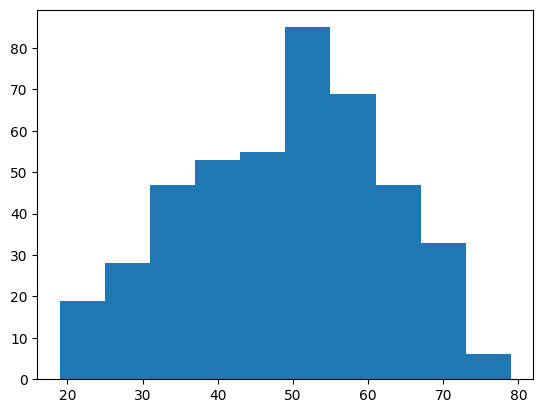

In [15]:
plt.hist(diabetes['AGE'])

Выглядит, если честно, так себе. Если посмотреть на этот график вне контекста - вообще не понятно, что он значит. Внесем ясности в график:
1. Добавим **заголовок**: `plt.title(...)`
2. Подпишем ось **OX**: `plt.xlabel(...)`
3. Подпишем ось **OY**: `plt.ylabel(...)`

И в дополнение избавимся от ненужного текста, который выводит юпитер:
- Либо после отрисовки графика пишем `plt.show()`
- Либо на последней строчке с отрисовкой графика ставим точку с запятой (`;`)

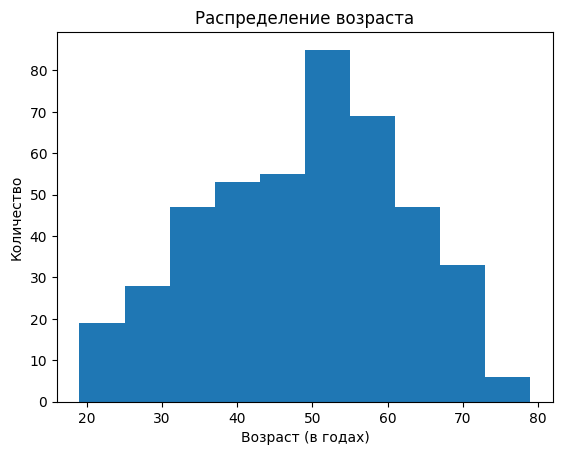

In [17]:
plt.hist(diabetes['AGE'])

plt.title('Распределение возраста')
plt.xlabel('Возраст (в годах)')
plt.ylabel('Количество')

plt.show()

Кастом подписей в в `plt.title`, `plt.xlabel()` и `plt.ylabel()`:
- **Размер подписей**: параметр `fontsize`. По умолчанию = 10.
- **Тип шрифта**: параметр `family`
- **Насыщенность шрифта**: параметр `fontweight`.

За возможными значениями идите по [ссылке](https://matplotlib.org/stable/users/explain/text/text_props.html) (или в гугл, или в gpt-like модели)

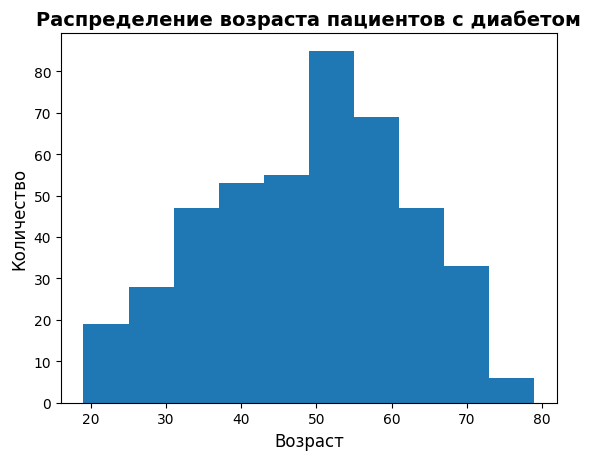

In [18]:
plt.hist(diabetes['AGE'])

plt.title(
    'Распределение возраста пациентов с диабетом',
    fontsize=14,
    family='sans-serif',
    fontweight='bold'
)
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Количество', fontsize=12)

plt.show()

Можно также изменить **размер** и **четкость гарфика**

Данную конструкцию пишут **перед** построением графика

```python
plt.figure(figsize=(width, height), dpi=n)
```
- `width` и `height` - регулируют размеры графика
- `dpi` - регулирует четкость графика


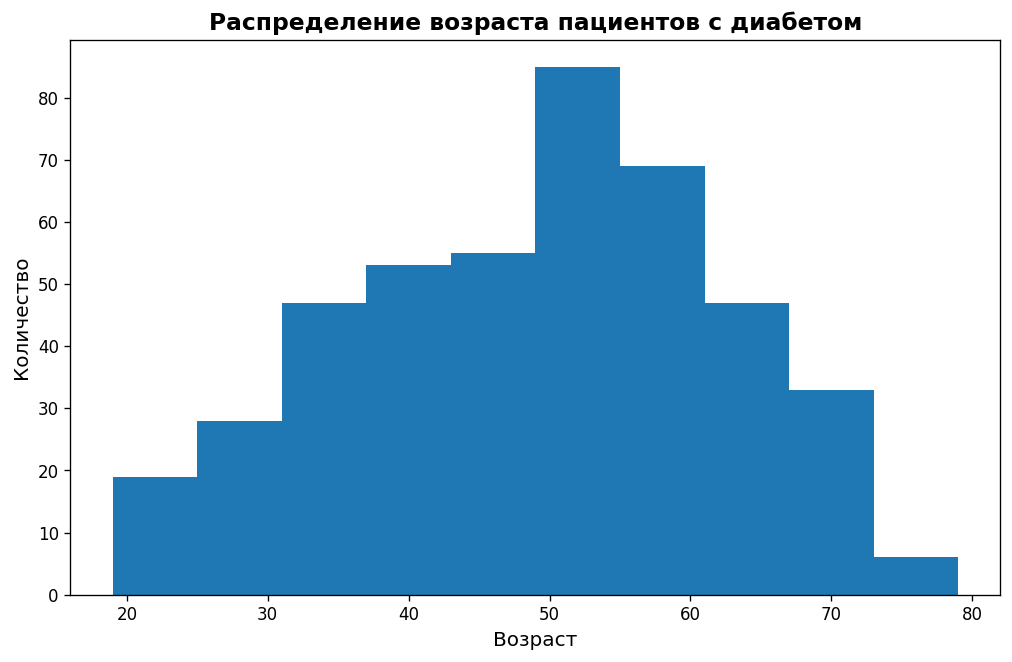

In [19]:
plt.figure(figsize=(10, 6), dpi=120)

plt.hist(diabetes['AGE'])

plt.title(
    'Распределение возраста пациентов с диабетом',
    fontsize=14,
    family='sans-serif',
    fontweight='bold'
)
plt.xlabel('Возраст', fontsize=12)
plt.ylabel('Количество', fontsize=12)

plt.show()

Теперь будем **кастомизировать сам график**. Используем аргументы из `.plt.hist()`

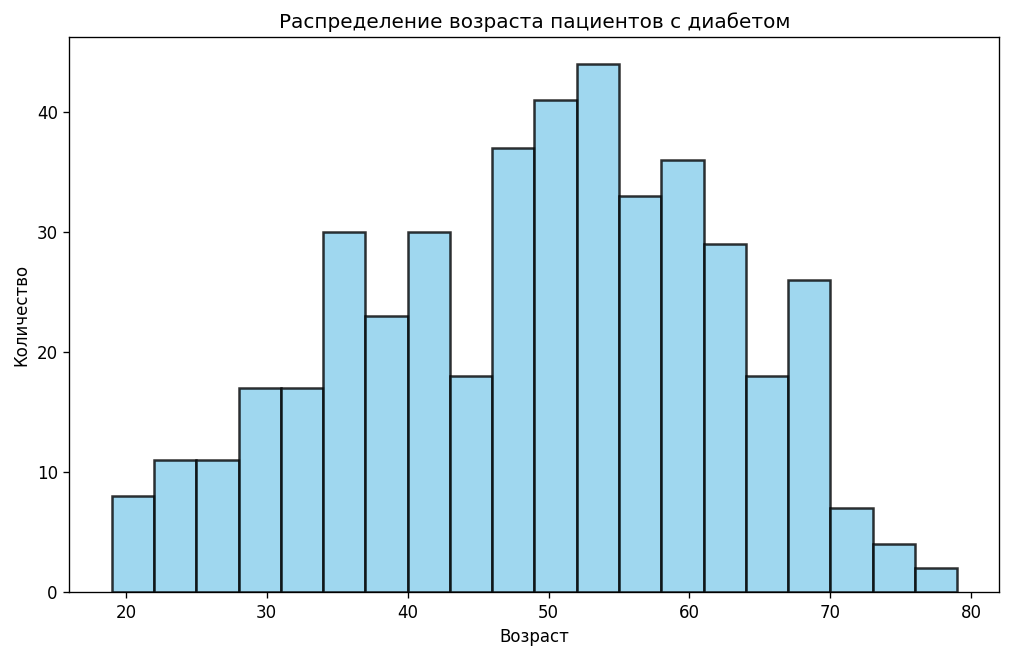

In [21]:
plt.figure(figsize=(10, 6), dpi=120)

plt.hist(
    diabetes['AGE'],
    bins=20,            # на сколько столбиков разбивать
    color='skyblue',    # цвет графика
    linewidth=1.5,      # ширина обводки столбиков
    edgecolor='black',  # обводка столбиков - черным
    alpha=0.8           # прозрачность бинов
    
)

plt.title('Распределение возраста пациентов с диабетом')
plt.xlabel('Возраст')
plt.ylabel('Количество')

plt.show()

<div style="background-color: rgba(34, 71, 157, 0.57); padding: 16px; border-radius: 8px; text-align: left;">

**🧩 Task**

Постройте гистограмму для признака **`BMI`** (индекс массы тела) из датасета `diabetes`:
- Задайте названия осей и название графика
- Задайте свой цвет графика
- Настройте количество столбцов
- Остальные аргументы - по желанию

</div>

In [ ]:
# your code here (｡•̀ᴗ-)✧


---

### *2.2 Диаграмма рассеяния*

<div style="background-color: rgba(128, 0, 128, 0.1); padding: 16px; border-radius: 8px; text-align: left;">

**Диаграмма рассеяния** (scatter plot) используется для отображения взаимосвязи между *двумя числовыми признаками*.

Каждая **точка** на графике представляет пару значений `(x, y)`. Диаграмма рассеяния позволяет визуально оценить корреляцию, тренды или кластеризацию данных. 
</div>

**Синтаксис** построения диаграммы рассеяния:

```python
    plt.scatter(df['feature_1'], df['feature_2'])
```



**Основные дополнительные аргументы**.

[Документация](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) - посмотреть все аргументы и возможные значения


| Аргумент         | Что делает                                                                 |
|-------------------|---------------------------------------------------------------------------|
| `s`              | Размер точек (число или массив для индивидуальных размеров). По умолчанию: 20. |
| `c`              | Цвет точек (строка, например, `'blue'`, или массив для раскраски по значениям). |
| `marker`         | Тип маркера (например, `'o'` — круги, `'s'` — квадраты, `'^'` — треугольники). По умолчанию: `'o'`. |
| `alpha`          | Прозрачность точек (от 0 до 1). По умолчанию: 1 (непрозрачные).           |
| `linewidths`     | Толщина обводки точек.                                                   |
| `edgecolors`     | Цвет обводки точек (например, `'black'`).                                 |
| `label`          | Метка для легенды.                                                       |
| `cmap`           | Цветовая карта для раскраски точек по значениям (например, `'viridis'`).  |

Нарисуем **зависимость артериального давления от ИМТ пациента**

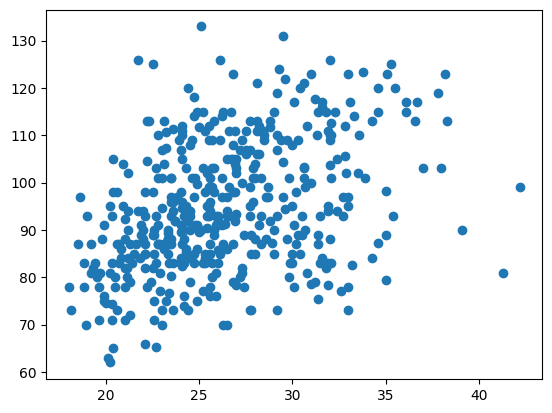

In [24]:
plt.scatter(diabetes['BMI'], diabetes['BP'])

Добавим базовые подписи и размер графика:

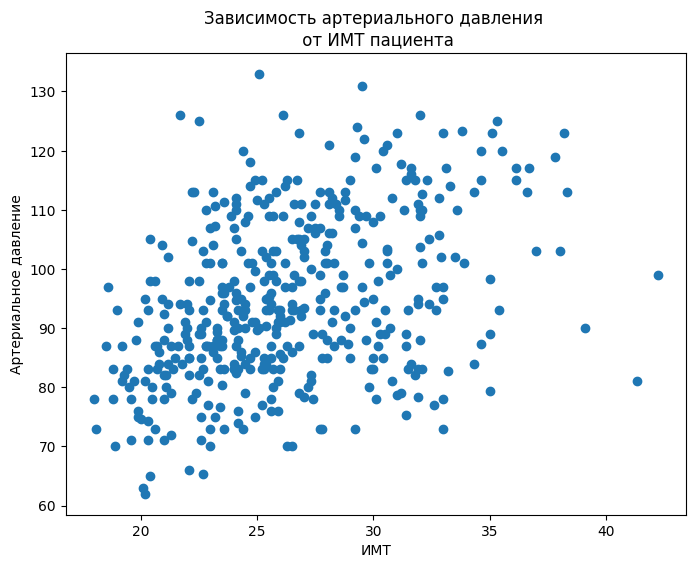

In [29]:
plt.figure(figsize=(8, 6))

plt.scatter(diabetes['BMI'], diabetes['BP'])

plt.title('Зависимость артериального давления \n от ИМТ пациента')
plt.xlabel('ИМТ')
plt.ylabel('Артериальное давление')

plt.show()

Снова кастомизируем график - добавим знакомые нам аргументы:
- `color` - цвет графика
- `edgecolor` - цвет обводки 

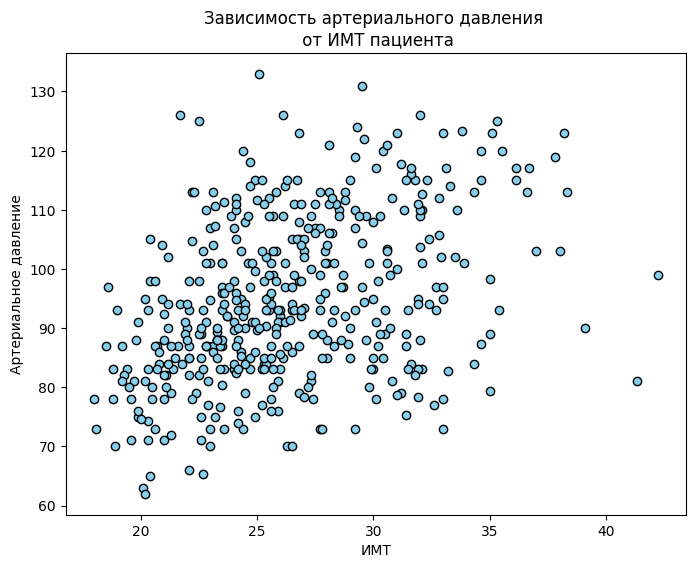

In [ ]:
plt.figure(figsize=(8, 6))

plt.scatter(
    diabetes['BMI'], diabetes['BP'],
    color='skyblue',
    edgecolor='k'
)

plt.title('Зависимость артериального давления \n от ИМТ пациента')
plt.xlabel('ИМТ')
plt.ylabel('Артериальное давление')

plt.show()

И новые в `scatterplot` аргументы:
- `s` - размер точек (по умолчанию 20)
- `marker` - если вместо точки хотите что-то другое (треугольник, крестик и т.п.). Возможные значения лучше посмотрите по [ссылке](https://matplotlib.org/stable/api/markers_api.html#module-matplotlib.markers)

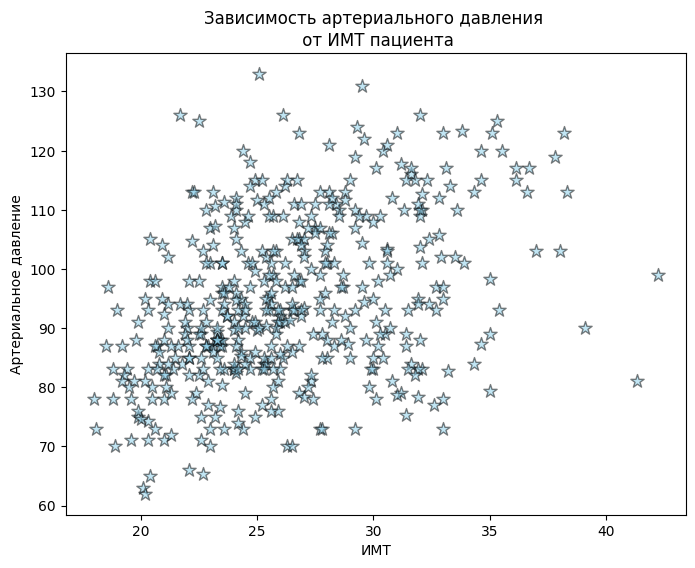

In [33]:
plt.figure(figsize=(8, 6))

plt.scatter(
    diabetes['BMI'], diabetes['BP'],
    color='skyblue',
    edgecolor='k',
    s=100,       # сделаем точки побольше
    alpha=0.5,   # сделаем их более прозрачными
    marker="*"   # звездочки вместо кружков
)

plt.title('Зависимость артериального давления \n от ИМТ пациента')
plt.xlabel('ИМТ')
plt.ylabel('Артериальное давление')

plt.show()

В качестве `s` можно передавать не просто цифру, но и **вектор** (столбец из таблицы)! Это означает, что д*ля каждой точки можно сделать свой размер, который зависит от значений другого столбца* (должен быть числовой)

Давайте попробуем сделать размер точек в зависимости от значений степени прогрессии диабета (`disease_progression`)

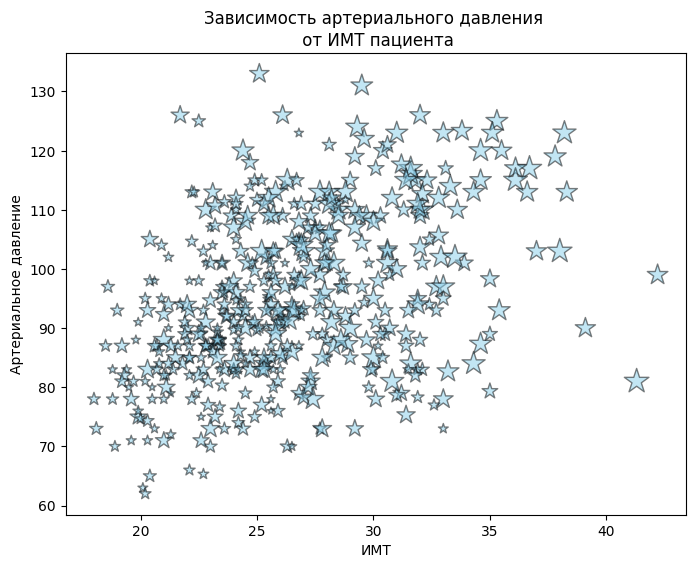

In [34]:
plt.figure(figsize=(8, 6))

plt.scatter(
    diabetes['BMI'], diabetes['BP'],
    color='skyblue',
    edgecolor='k',
    s=diabetes['disease_progression'],  # размер точки зависит от значения `disease_progression`
    alpha=0.5,
    marker="*"
)

plt.title('Зависимость артериального давления \n от ИМТ пациента')
plt.xlabel('ИМТ')
plt.ylabel('Артериальное давление')

plt.show()

Аналогично можно сделать с цветом:
```python
plt.scatter(
    ...,
    c = df['feature']
)
plt.colorbar(label = '...')

```


- За это ответственнен параметр `c`
- Точка будет окрашена в цвет в соответствие со значениями из какого-то **числового** столбца `feature`
- Нужно убрать параметр `color`
- Лучше перед `.plt.show()` поставить `plt.colorbar()` - он нарисует шкалу соответствия "цвет-значение" на графике. Это сделает график более интерпретируемым. Название колорбара можно передать в аргумент `label`

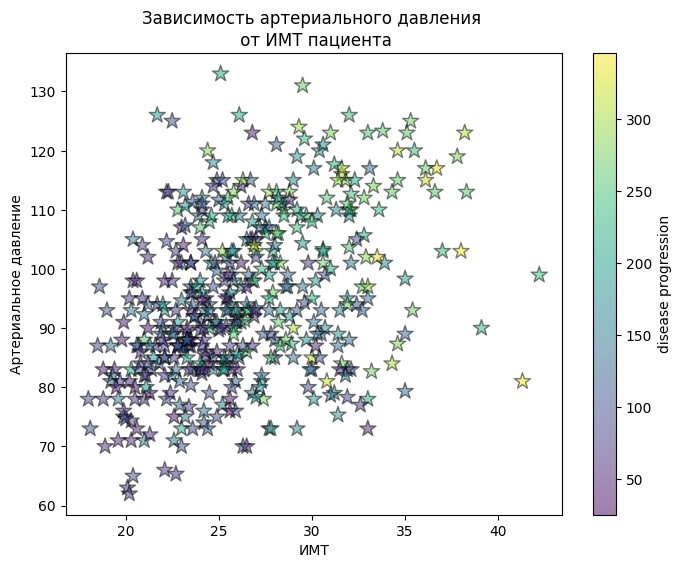

In [44]:
plt.figure(figsize=(8, 6))

plt.scatter(
    diabetes['BMI'], diabetes['BP'],
    c=diabetes['disease_progression'],  # цвет точки зависит от значения `disease_progression`
    edgecolor='k',
    s=150,
    alpha=0.5,
    marker="*"
)

plt.title('Зависимость артериального давления \n от ИМТ пациента')
plt.xlabel('ИМТ')
plt.ylabel('Артериальное давление')

# для отображения "полоски", показывающей соответстие цифры и цвета
# в `label` можно передать название колорбара
plt.colorbar(label='disease progression')

plt.show()

<div style="background-color: rgba(34, 71, 157, 0.57); padding: 16px; border-radius: 8px; text-align: left;">

**🧩 Task**

Постройте диаграмму рассеяния, показывающую зависимость уровня сахара в крови (**`glu`**) от возраста (**`AGE`**) из датасета `diabetes`.
- Задайте названия осей и название графика
- Сделайте размер точек зависимым от уровня артериального давления (**`BP`**)
- Задайте свой цвет графика и свой тип маркеров (не кружки!)
- Остальные аргументы - по желанию

</div>

In [ ]:
# your code here (⌐▨_▨)


---

### *2.3 Круговая диаграмма*

<div style="background-color: rgba(128, 0, 128, 0.1); padding: 16px; border-radius: 8px; text-align: left;">

**Круговая диаграмма** (pie chart) используется для отображения долей или пропорций **категориальных** данных.

Каждая категория представлена *сектором* круга, *размер* которого пропорционален доле этой категории в данных.

</div>

**Синтаксис** построения круговой диаграммы:

```python
    plt.pie(sizes, labels=labels)
```
- `sizes` — массив или список значений, представляющих **размеры** секторов (например, количество или процент для каждой категории).
- `labels` — список **названий** категорий, соответствующих секторам.

**Основные дополнительные аргументы**.

[Документация](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pie.html) - посмотреть все аргументы и возможные значения

| Аргумент         | Что делает                                                                 |
|-------------------|---------------------------------------------------------------------------|
| `labels`         | Список названий для каждого сектора.                                      |
| `colors`         | Список цветов для секторов (например, ['red', 'blue', 'green']).        |
| `autopct`        | Формат отображения процентов на секторах (например, '%.1f%%').           |
| `startangle`     | Угол поворота начального сектора в градусах (по умолчанию: 0).            |
| `explode`        | Список смещений секторов от центра (например, [0, 0.1, 0] для выделения). |
| `shadow`         | Если True, добавляет тень для 3D-эффекта. По умолчанию: False.         |
| `wedgeprops`     | Словарь для настройки секторов (например, {'edgecolor': 'black'}).       |
| `textprops`      | Словарь для настройки текста (например, {'fontsize': 12}).               |

Нарисуем распределение пациентов по **полу** (**`SEX`**). Для этого нужно построить **частотную таблицу**:

In [45]:
sex_diabetes = diabetes['SEX'].value_counts()
sex_diabetes

SEX
female    235
male      207
Name: count, dtype: int64

- `.index` - атрибут для получения названия категорий
- `.values` - атрибут для получения соответствующих частот

In [48]:
print(sex_diabetes.index.to_list())
print(sex_diabetes.values)

['female', 'male']
[235 207]


Нарисуем **круговую** диаграмму - сразу с подписями:

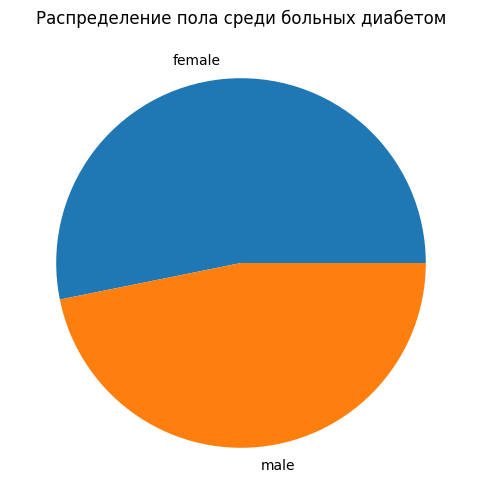

In [49]:
plt.figure(figsize=(8, 6), dpi=100)

plt.pie(sex_diabetes.values, labels=sex_diabetes.index)

plt.title('Распределение пола среди больных диабетом')
plt.show()

Кастомизируем:
- `colors` - передаем **список** цветов. Должен соответствовать количеству категорий!
- `autopct` - для отображения **долей** категорий
    - можно передать функцию, которая будет округлять долю до какого-то знака после запятой. Например анонимную функцию: `lambda x round(x, 2)`:
    - можно сделать форматированием: `'%.1f%%'` (цифра - до какого числа знаком после запятой округлять долю)

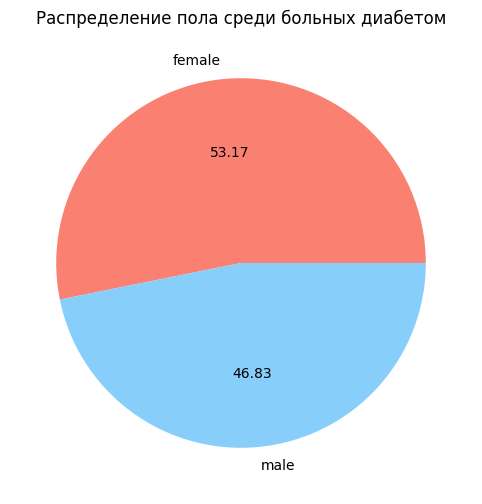

In [59]:
plt.figure(figsize=(8, 6), dpi=100)

plt.pie(
    sex_diabetes.values,
    labels=sex_diabetes.index,
    colors=['salmon', 'lightskyblue'],
    autopct=lambda x: round(x, 2),  # или '%.2f%%'
)

plt.title('Распределение пола среди больных диабетом')
plt.show()

Можно сделать график объемным:
- `shadow=True`
- `explode` - передаем **список** из значений, на сколько нам "выдвинуть" сектор. *Длина списка должна соответствовать колчиеству категорий*. Например `[0, 0.1]` означает, что вторую категорию мы "выдуваем" из круга на `0.1`

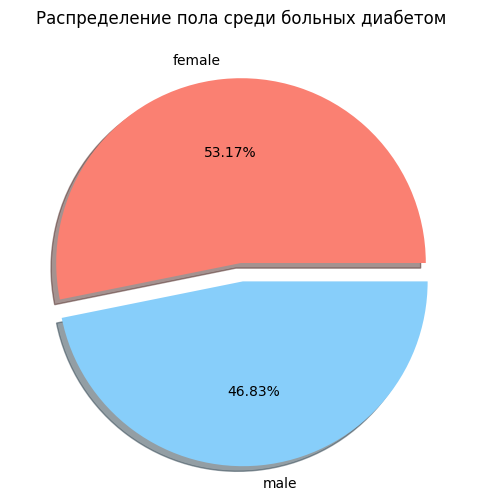

In [65]:
plt.figure(figsize=(8, 6), dpi=100)

plt.pie(
    sex_diabetes.values,
    labels=sex_diabetes.index,
    colors=['salmon', 'lightskyblue'],
    autopct='%.2f%%',
    shadow=True,        # добавляем тень
    explode=[0, 0.1]    # отодвигаем вторую категорию из пирога
)

plt.title('Распределение пола среди больных диабетом')
plt.show()

<div style="background-color: rgba(34, 71, 157, 0.57); padding: 16px; border-radius: 8px; text-align: left;">

**🧩 Task**

Постройте круговую диаграмму для распределения людей по уровню артериального давления (АД)
- Создайте признак `BP_coded` по следующему правилу:
    - уровень АД меньше 80 -> `low`
    - уровень АД от 80 до 120 -> `normal`
    - уровень АД от 120 до 140 -> `prehypertension`
    - уровень АД больше 140 до 160 -> `hypertension`
    - в остальных случаях вернуть `x` (если это пропуск)
- Задайте названия осей и название графика
- Отобразите доли категорий (в процентах) с одним знаком после запятой
- Отделите одну (или больше) категорию из секторов (`explode`)
- Для каждой категории сделайте свой цвет
- Остальные аргументы - по желанию

</div>

In [ ]:
# your code here (づ ◕‿◕ )づ


---

### *2.4 Столбчатая диаграмма*

<div style="background-color: rgba(128, 0, 128, 0.1); padding: 16px; border-radius: 8px; text-align: left;">

**Столбчатая диаграмма** (bar chart) используется для отображения значений **категориальных** данных или **агрегированных числовых** данных.

Каждый столбец представляет *категорию*, а его высота соответствует какому-то его *значению*. Часто в виде значений используется частота встречаемости в таблице ("популярность")
</div>

**Синтаксис** построения столбчатой диаграммы:

```python
    plt.bar(categories, values)
```
- `categories` — список категорий (названия столбцов, отображаемые на оси X).
- `values` — список или массив значений, определяющих высоту столбцов.

**Основные дополнительные аргументы**.

[Документация](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html) - посмотреть все аргументы и возможные значения

| Аргумент         | Что делает                                                                 |
|-------------------|---------------------------------------------------------------------------|
| `width`          | Ширина столбцов (от 0 до 1). По умолчанию: 0.8.                           |
| `color`          | Цвет столбцов (строка, например, 'blue',).            |
| `edgecolor`      | Цвет обводки столбцов (например, 'black').                              |
| `linewidth`      | Толщина обводки столбцов.                                                |
| `alpha`          | Прозрачность столбцов (от 0 до 1). По умолчанию: 1 (непрозрачные).       |
| `align`          | Выравнивание столбцов: 'center' (по умолчанию) или 'edge'.            |
| `label`          | Метка для легенды.                                                       |
| `tick_label`     | Список названий для категорий на оси (альтернатива `categories`).         |

Для примера создадим **категоризацию** возраста пациентов (**`AGE`**) на три группы:
- молодые (<40 лет)
- взрослые (40–60 лет)
- пожилые (>60 лет)

и подсчитаем количество пациентов в каждой группе.

In [67]:
def age_code(x):
    if x < 40:
        return 1
    elif x < 60:
        return 2
    else:
        return 3

diabetes['age_coded'] = diabetes['AGE'].apply(age_code)

Построим частотную таблицу:

In [69]:
# да через точку обращаться к столбцу можно (если в названии нет пробела!!!)
diabetes.age_coded.value_counts()

age_coded
2    222
1    117
3    103
Name: count, dtype: int64

И строим столбчатую диаграмму:

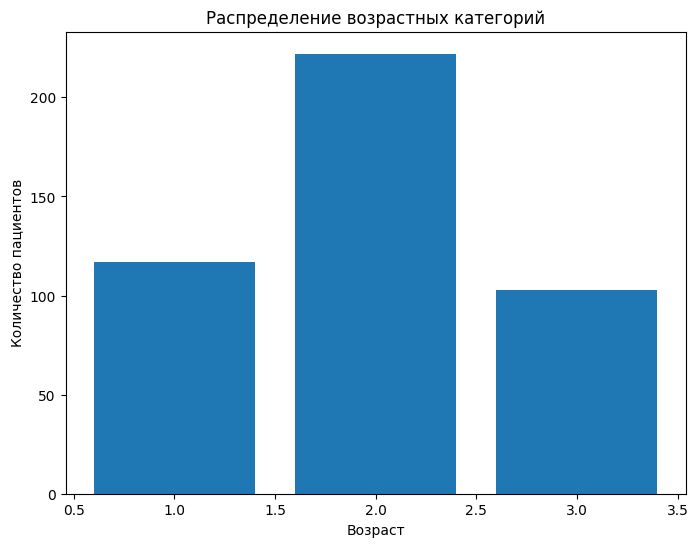

In [ ]:
plt.figure(figsize=(8, 6), dpi=100)

# считаем частоты каждой категории
age_dist = diabetes.age_coded.value_counts()

# по OX - категории (x)
# по OY - частоты категорий (height)
plt.bar(x=age_dist.index, height=age_dist.values)

plt.title('Распределение возрастных категорий')
plt.xlabel('Возраст')
plt.ylabel('Количество пациентов')

plt.show()

Кастомизииируем:

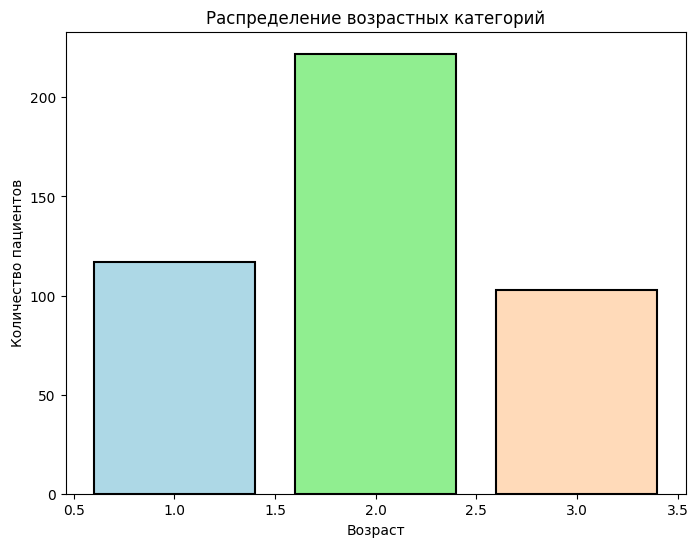

In [72]:
plt.figure(figsize=(8, 6), dpi=100)

# считаем частоты каждой категории
age_dist = diabetes.age_coded.value_counts()

plt.bar(
    x=age_dist.index,
    height=age_dist.values,
    color=['lightgreen', 'lightblue', 'peachpuff'], # соответствует числу категорий
    edgecolor='k',      # это черный
    linewidth=1.5       # ширина обводки
)

plt.title('Распределение возрастных категорий')
plt.xlabel('Возраст')
plt.ylabel('Количество пациентов')

plt.show()

По оси OY можно отображать не только частоты. Например, можно отобразить средний ИМТ для каждой возрастной группы. Для этого применим **группировку**:

In [73]:
diabetes.groupby('age_coded')['BMI'].mean()

age_coded
1    25.230769
2    26.661712
3    27.060194
Name: BMI, dtype: float64

И теперь нарисуем гистограмму для этого

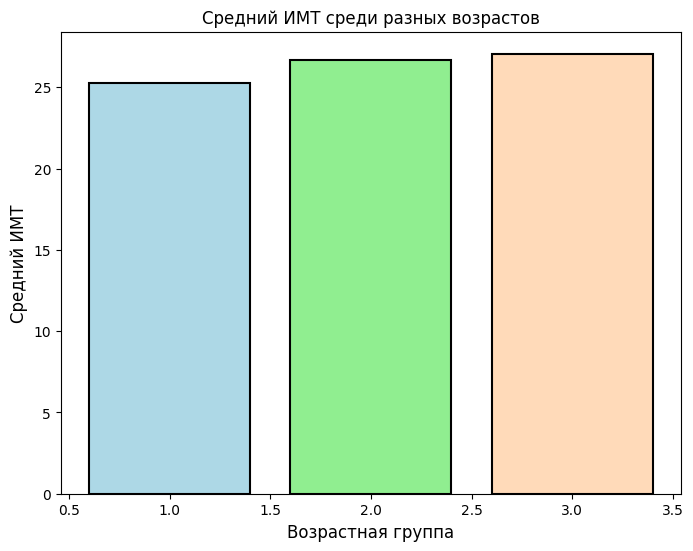

In [74]:
plt.figure(figsize=(8, 6), dpi=100)

# считаем средний ИМТ для каждой возрастной категори
bmi_ages = diabetes.groupby('age_coded')['BMI'].mean()

plt.bar(bmi_ages.index, 
        bmi_ages.values, 
        color=['lightblue', 'lightgreen', 'peachpuff'],
        edgecolor='black',
        linewidth=1.5
        )

plt.title('Средний ИМТ среди разных возрастов')
plt.xlabel('Возрастная группа', fontsize=12)
plt.ylabel('Средний ИМТ', fontsize=12)

plt.show()


<div style="background-color: rgba(34, 71, 157, 0.57); padding: 16px; border-radius: 8px; text-align: left;">

**🧩 Task**

Постройте столбчатую диаграмму, показывающую *средний* уровень сахара в крови (**`glu`**) для каждой возрастной категории (**`age_coded`**) из датасета `diabetes`.
- Задайте названия осей и название графика
- Для каждой категории сделайте свой цвет
- Настройте ширину столбцов и добавьте черную обводку
- Остальные аргументы - по желанию

</div>

In [ ]:
# your code here ٩(◕‿◕)۶


---

### *2.5 Линейный график*

<div style="background-color: rgba(128, 0, 128, 0.1); padding: 16px; border-radius: 8px; text-align: left;">

**Линейный график** (line plot) используется для отображения зависимости между двумя *числовыми* переменными, где точки соединяются линиями.

Он идеально подходит для визуализации **трендов** или просто изменений чего-то со **временем** (динамики).

</div>

**Синтаксис** построения линейного графика:

```python
    plt.plot(x, y)
```
- `x` - значения, зависимость от чего хотим посмотреть (вектор или столбец из датасета). У нас это даты
- `y` - значения, зависимость чего хотим посмотреть. В случае с датами - динамику чего хотим отследить

[Документация](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) - посмотреть все аргументы и возможные значения

| Аргумент         | Что делает                                                                 |
|-------------------|---------------------------------------------------------------------------|
| `color`          | Цвет линии (например, 'blue', '#FF5733').                             |
| `linewidth`      | Толщина линии (число, например, 2.0). По умолчанию: 1.0.                |
| `linestyle`      | Стиль линии (например, '-' — сплошная, '--' — пунктир, ':' — точечная). |
| `marker`         | Тип маркера для точек (например, 'o' — кружки, 's' — квадратики, ...).        |
| `markersize`     | Размер маркеров (число, например, 8).                                   |
| `alpha`          | Прозрачность линии и маркеров (от 0 до 1). По умолчанию: 1.               |
| `label`          | Метка для легенды.                                                       |

Так как линейный график лучше всего подходит для отображения динамики чего-либо, мы возьмем другой датасет, где есть временная составляющая.

In [75]:
covid = pd.read_csv('https://raw.githubusercontent.com/ksumarshmallow/Data-Analysis-Media-24/refs/heads/main/data/covid.csv')
covid.head()

,Date,Country_Region,alpha-3_code,Population,Total_Confirmed_Cases,Total_Fatalities,Total_Recovered_Cases,New_Confirmed_Cases,New_Fatalities,New_Recovered_Cases,Remaining_Confirmed_Cases
0,2020-01-22,Afghanistan,AFG,37172386,0,0,0,0,0,0,0
1,2020-01-22,Albania,ALB,2866376,0,0,0,0,0,0,0
2,2020-01-22,Algeria,DZA,42228429,0,0,0,0,0,0,0
3,2020-01-22,Andorra,AND,77006,0,0,0,0,0,0,0
4,2020-01-22,Angola,AGO,30809762,0,0,0,0,0,0,0


In [76]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70464 entries, 0 to 70463
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Date                       70464 non-null  object
 1   Country_Region             70464 non-null  object
 2   alpha-3_code               68629 non-null  object
 3   Population                 70464 non-null  int64 
 4   Total_Confirmed_Cases      70464 non-null  int64 
 5   Total_Fatalities           70464 non-null  int64 
 6   Total_Recovered_Cases      70464 non-null  int64 
 7   New_Confirmed_Cases        70464 non-null  int64 
 8   New_Fatalities             70464 non-null  int64 
 9   New_Recovered_Cases        70464 non-null  int64 
 10  Remaining_Confirmed_Cases  70464 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 5.9+ MB


Продемонстрируем ежедневную динамику новых подтвержденных случаев (`New_Confirmed_Cases`)  в России (`Country_Region` - Russia)

In [78]:
#  фильтрация
covid_rus = covid[covid['Country_Region'] == 'Russia']
covid_rus.shape

(367, 11)

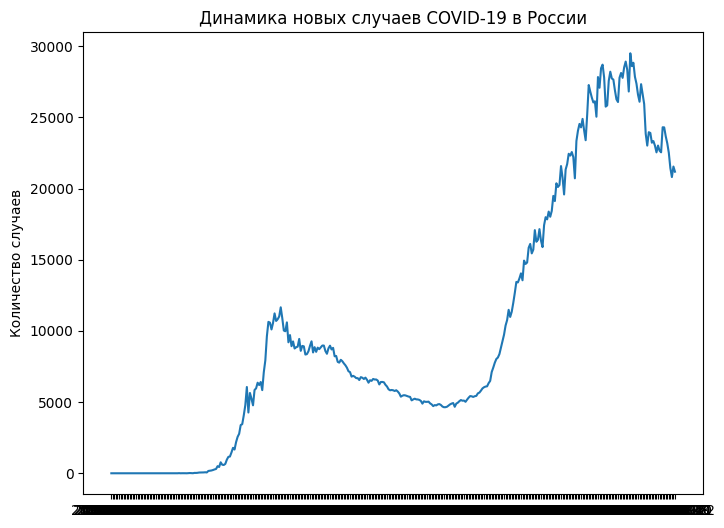

In [79]:
plt.figure(figsize=(8, 6), dpi=100)

plt.plot(covid_rus['Date'], covid_rus['New_Confirmed_Cases'])

plt.title('Динамика новых случаев COVID-19 в России')
plt.ylabel('Количество случаев')

plt.show()

Упс, даты как-то плохо отображаются по оси OX. Это можно исправить, отрегулировав `xticks()`. Ему можно задать параметр `ticks` - и передать в него те метки, которые хотим видеть по OX. Так, мы можем взять просто каждую  $i$-ю метку из исходных данных

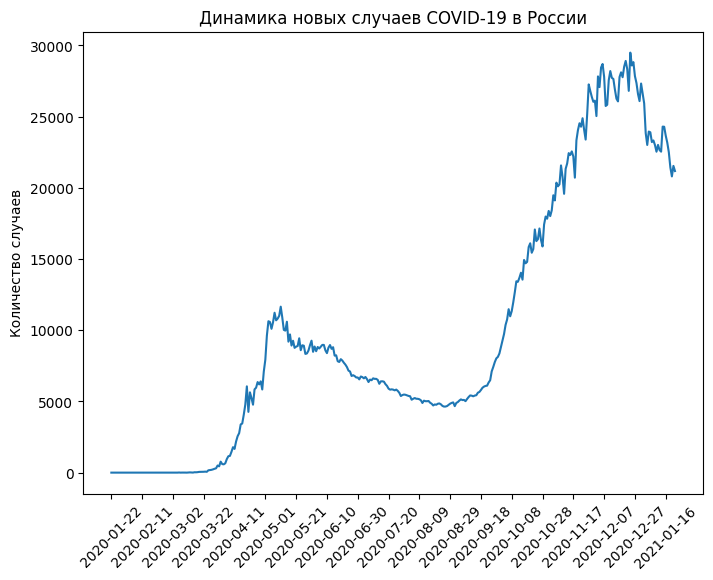

In [81]:
plt.figure(figsize=(8, 6), dpi=100)

plt.plot(covid_rus['Date'], covid_rus['New_Confirmed_Cases'])

plt.title('Динамика новых случаев COVID-19 в России')
plt.ylabel('Количество случаев')

# Возьмем срез по датам с шагом 100 - отображаем каждую 100-ю дату
# И поворачиваем на 45 градусов
plt.xticks(ticks = covid_rus['Date'][::20], rotation=45)

plt.show()

Кастомизируем:

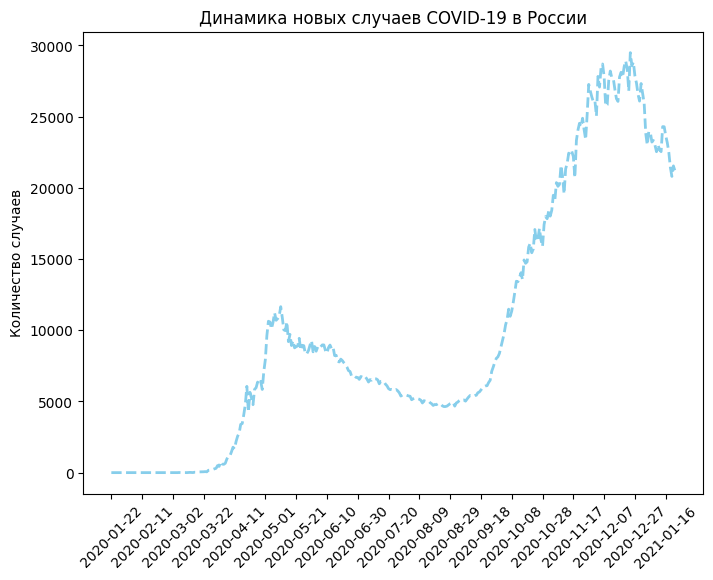

In [85]:
plt.figure(figsize=(8, 6), dpi=100)

plt.plot(
    covid_rus['Date'], covid_rus['New_Confirmed_Cases'],
    color='skyblue',
    linewidth=2,    # ширина линии
    linestyle='--'  # линия пунктиром
)

plt.title('Динамика новых случаев COVID-19 в России')
plt.ylabel('Количество случаев')

plt.xticks(ticks = covid_rus['Date'][::20], rotation=45)

plt.show()

<div style="background-color: rgba(34, 71, 157, 0.57); padding: 16px; border-radius: 8px; text-align: left;">

**🧩 Task**

Постройте линейный график, показывающий динамику новых смертей от COVID-19 (`New_Deaths`) в России из датасета `covid`.
- Задайте названия осей и название графика
- Настройте свой цвет и тип линии
- Установите метки по оси X с шагом 20 и поверните их на 45 градусов
- Остальные аргументы - по желанию

</div>

In [ ]:
# your code here (⌐▨_▨)


---

## **3. Несколько графиков**

### *3.1 Несколько графиков внутри одного блока*

Для наглядного сравнения двух или более зависимостей удобно разместить несколько графиков на одной области (оси). В matplotlib это делается с помощью повторного вызова функции построения, например, `plt.plot()` для линейных графиков, перед вызовом `plt.show()`.

Давайте дополним предыдущий линейный график - помимо новых случаев COVID-19 в России добавим еще и динамику новых случаев в **Германии**.

In [86]:
covid_germany = covid[covid['Country_Region'] == 'Germany']

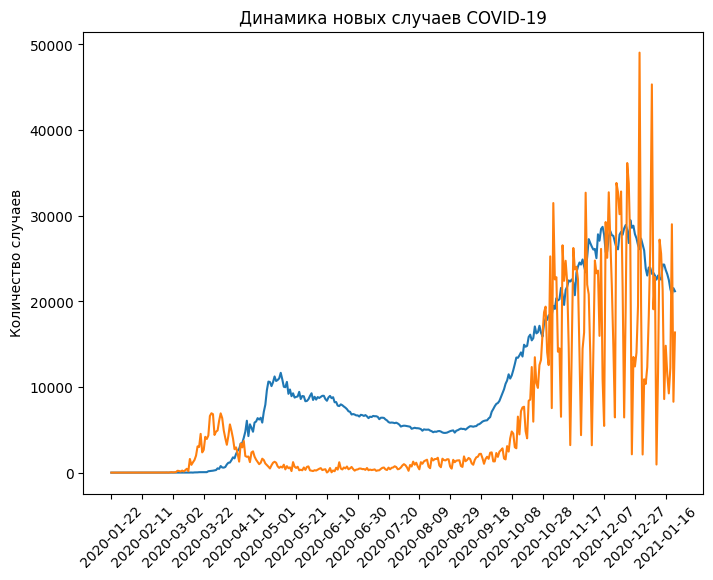

In [87]:
plt.figure(figsize=(8, 6), dpi=100)

# для России
plt.plot(covid_rus['Date'], covid_rus['New_Confirmed_Cases'])

# для Германии
plt.plot(covid_germany['Date'], covid_germany['New_Confirmed_Cases'])

plt.title('Динамика новых случаев COVID-19')
plt.ylabel('Количество случаев')
plt.xticks(ticks = covid_rus['Date'][::20], rotation=45)

plt.show()

Теперь у нас есть два графика. Но не понятно - что значит каждая линия?

Чтобы это исправить, делаем следующее:
- в `plt.plot()` добавляем `label` - в нем указываем название "подграфика"
- перед `plot.show()` пишем `plt.legend()`, чтобы названия отобразились на графике

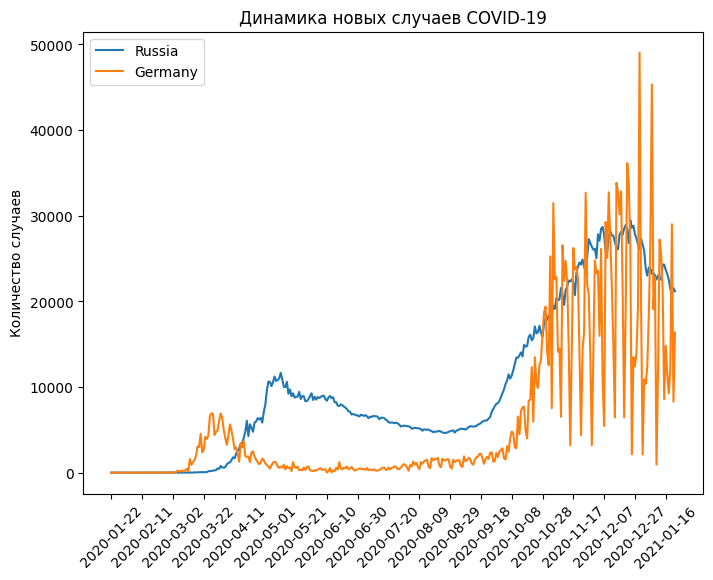

In [88]:
plt.figure(figsize=(8, 6), dpi=100)

plt.plot(
    covid_rus['Date'], covid_rus['New_Confirmed_Cases'],
    label='Russia'  # передаем label
)

plt.plot(
    covid_germany['Date'], covid_germany['New_Confirmed_Cases'],
    label='Germany'  # передаем label
)

plt.title('Динамика новых случаев COVID-19')
plt.ylabel('Количество случаев')
plt.xticks(ticks = covid_rus['Date'][::20], rotation=45)

# создаем окошко, куда добавятся подписи графиков
plt.legend()

plt.show()

Можно регулировать визуал и положение легенды. Подробнее про всякие аргументы - в [**документации**](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html) (но иногда легче загуглить то, что хотите сделать; или попросить языковых друзей)

Пример:

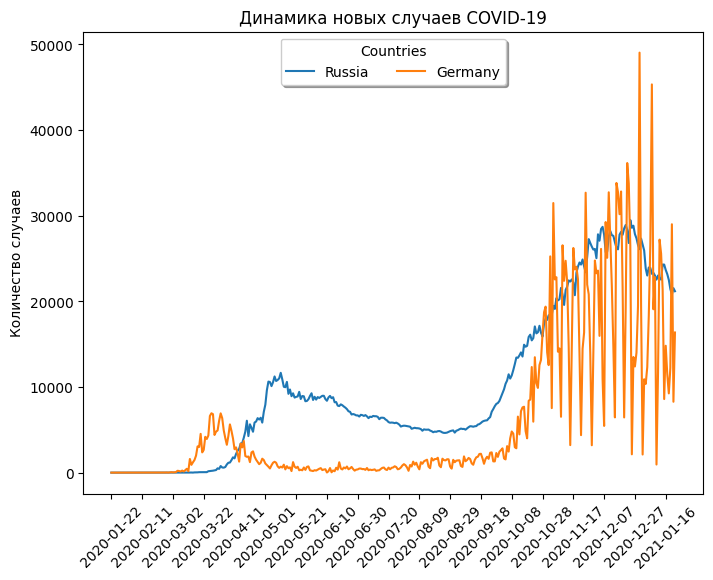

In [90]:
plt.figure(figsize=(8, 6), dpi=100)

plt.plot(
    covid_rus['Date'], covid_rus['New_Confirmed_Cases'],
    label='Russia'
)

plt.plot(
    covid_germany['Date'], covid_germany['New_Confirmed_Cases'],
    label='Germany'
)

plt.title('Динамика новых случаев COVID-19')
plt.ylabel('Количество случаев')
plt.xticks(ticks = covid_rus['Date'][::20], rotation=45)

plt.legend(
    loc='upper center',         # размещаем в центре сверху
    title='Countries',          # название легенды
    frameon=True,               # добавляем рамку
    ncol=2,                     # labels в две колонки
    shadow=True,                # с тенью
)

plt.show()

Вместе можно рисовать не только одинаковые типы графиков, но и разные. Например, можно нарисовать график рассеяния совместно с линейным графиком.

<div style="background-color: rgba(34, 71, 157, 0.57); padding: 16px; border-radius: 8px; text-align: left;">

**🧩 Task**

Постройте два линейных графика на одной области, показывающих динамику новых случаев COVID-19 (`New_Confirmed_Cases`) в России и Италии (`Country_Region`; **Russia**, **Italy**) из датасета `covid`.
- Задайте названия осей и название графика
- Для каждой страны сделайте свой цвет и тип линии (например - голубая сплошная для России и красный пунктир для Италии)
- Установите метки по оси X с шагом 20 и поверните их на 45 градусов
- Остальные аргументы - по желанию

</div>

In [ ]:
# your code here (⌐▨_▨)


---

### *3.2 Несколько графиков в разных окнах - метод `subplots`*

График разбивается на две части:
* `fig` - отвечает за график в целом (штука, где график хранится как картинка)
* `ax` - это просто координатная сетка, где строится график

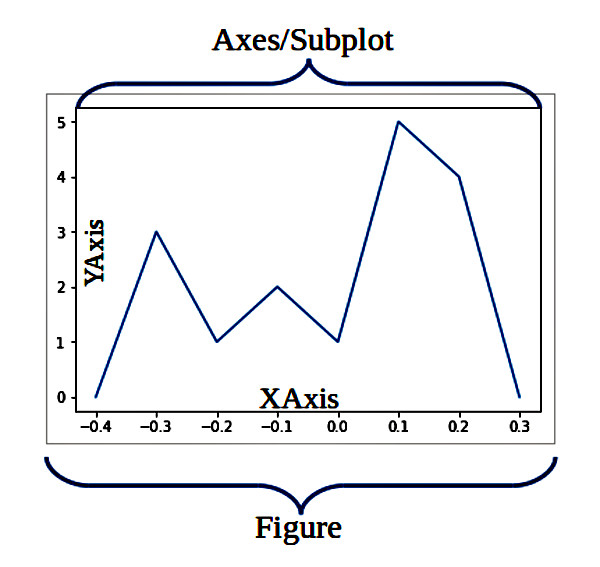

Мы можем разбить **координатную сетку** на несколько частей, и в каждой нарисовать свой график. 

Для этого используется `plt.subplots()`:

```python
fig, ax = plt.subplots(num_x, num_y, figsize=(width, height))
```
- `num_x` - количество графиков по OX
- `num_y` - количество графиков по OY

(суммарное число "окон" = `num_x` * `num_y`)

После каждый график рисуется отдельно на своем `ax`.

Построим два графика:
- Распределение уровня "хорошего" холестерина (колонка `ldl`)
- Распределение уровня "плохого" холестерина (колонка `hdl`)

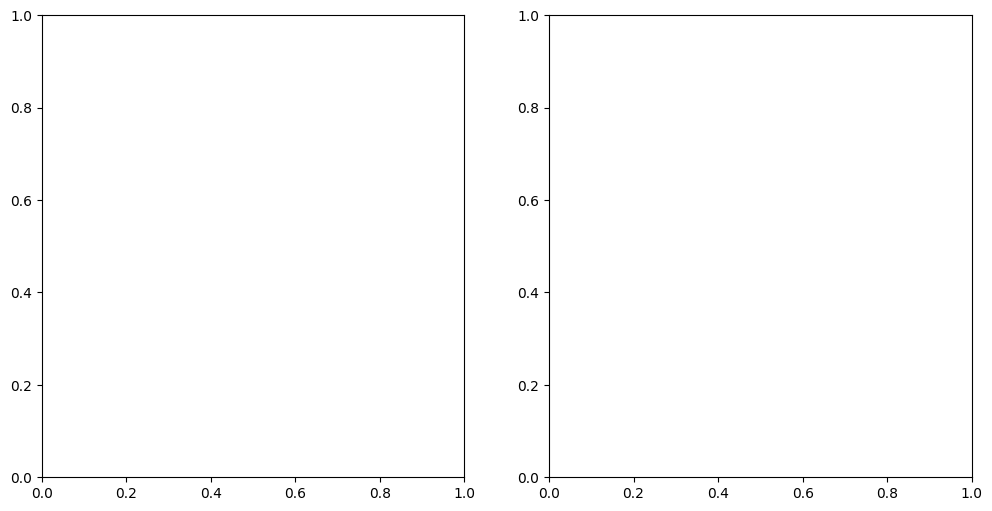

In [96]:
# создаем два окна: делим по OY
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

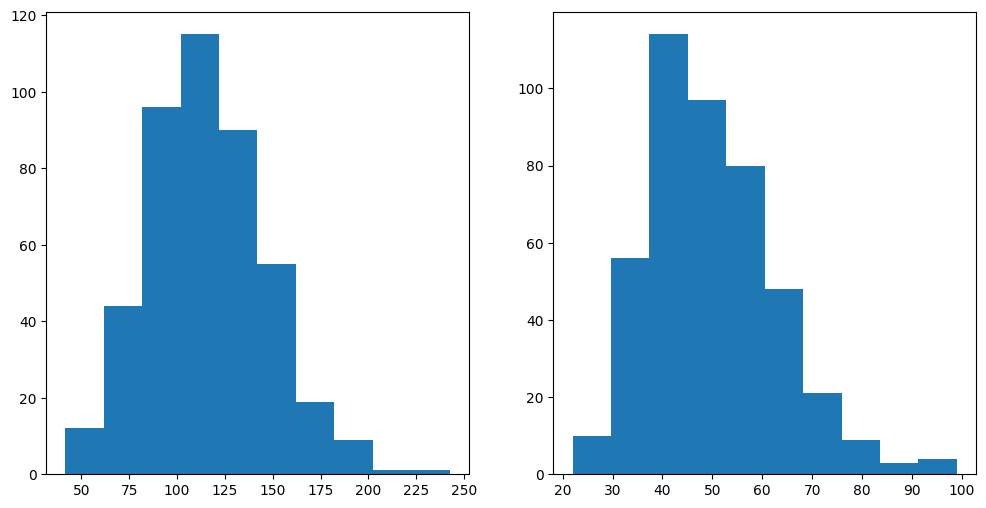

In [98]:
# создаем два окна: делим по OY
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# На первом (левом) окне нарисуем распределение плохого холестерина
# вместо plt.hist() -> рисуем на ax[0]
ax[0].hist(diabetes['ldl'])

# На правом рисуем распределение хорошего холестерина
ax[1].hist(diabetes['hdl'])

plt.show()

Для подписей подграфиков используются другие методы:
- `.set_title()` - название подграфика
- `.set_xlabel()` - название оси OX на подграфике
- `.set_ylabel()` - название оси OY на подграфике

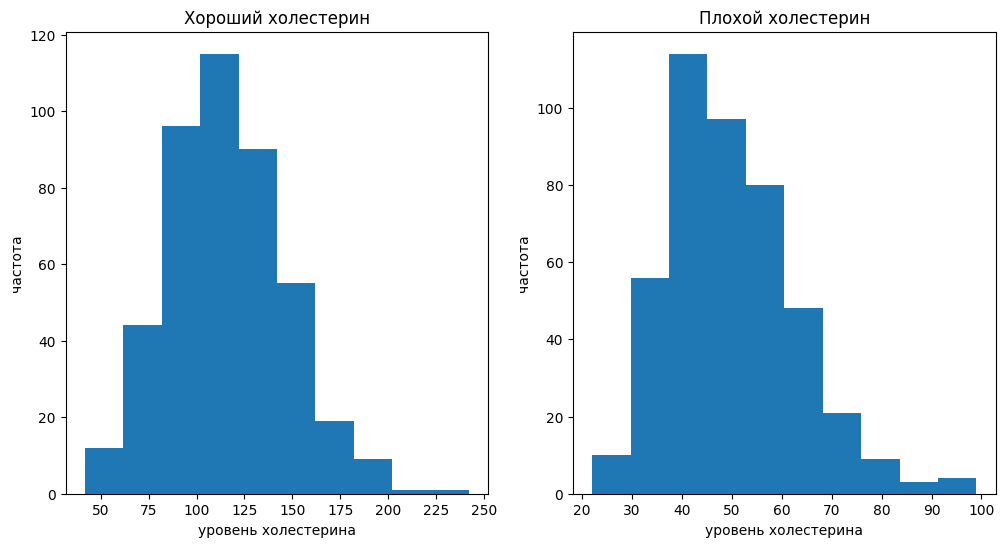

In [99]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# рисуем графики
ax[0].hist(diabetes['ldl'])
ax[1].hist(diabetes['hdl'])

# добавляем подписи на КАЖДОЕ из окон
ax[0].set_xlabel('уровень холестерина')
ax[1].set_xlabel('уровень холестерина')

ax[0].set_ylabel('частота')
ax[1].set_ylabel('частота')

ax[0].set_title('Хороший холестерин')
ax[1].set_title('Плохой холестерин')

plt.show()

Можно сделать shared-оси - аргументы в `plt.subplots()`:
- `sharey = True` - будет одинаковые координаты по OY (и названия)
- `sharex = True` - будет одинаковые координаты по OX (и названия)

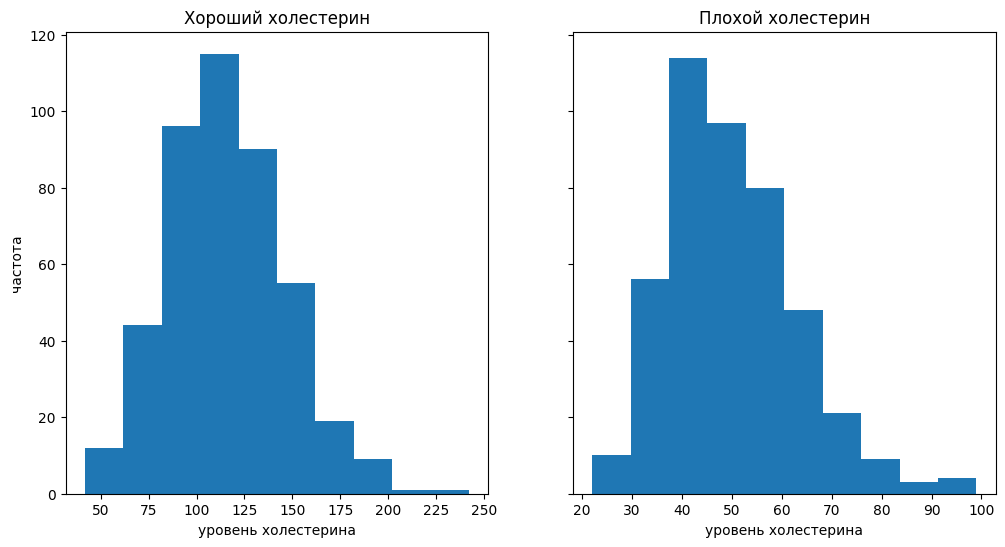

In [100]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# рисуем графики
ax[0].hist(diabetes['ldl'])
ax[1].hist(diabetes['hdl'])

# добавляем подписи на КАЖДОЕ из окон
ax[0].set_xlabel('уровень холестерина')
ax[1].set_xlabel('уровень холестерина')

# одно избыточно, тк оси shared
ax[0].set_ylabel('частота')

ax[0].set_title('Хороший холестерин')
ax[1].set_title('Плохой холестерин')

plt.show()

В конце концов сделаем графики красивше:

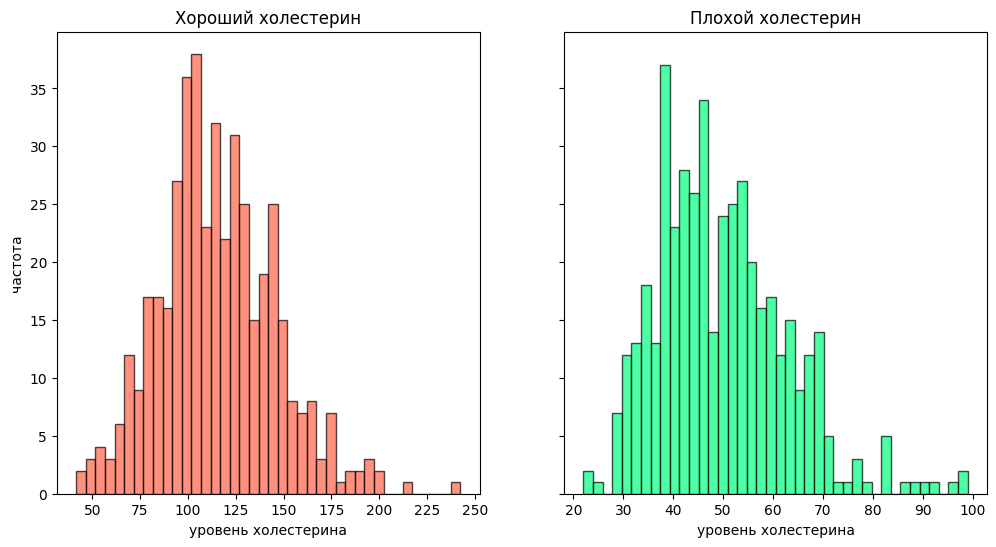

In [101]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# рисуем графики
ax[0].hist(diabetes['ldl'], color='tomato', bins=40, edgecolor='black', alpha=0.7)
ax[1].hist(diabetes['hdl'], color='springgreen', bins=40, edgecolor='black', alpha=0.7)

# добавляем подписи на КАЖДОЕ из окон
ax[0].set_xlabel('уровень холестерина')
ax[1].set_xlabel('уровень холестерина')

# одно избыточно, тк оси shared
ax[0].set_ylabel('частота')

ax[0].set_title('Хороший холестерин')
ax[1].set_title('Плохой холестерин')

plt.show()

<div style="background-color: rgba(34, 71, 157, 0.57); padding: 16px; border-radius: 8px; text-align: left;">

**🧩 Task**

Постройте два подграфика в одном окне (1 строка, 2 столбца), показывающих:
- Гистограмму уровня сахара в крови (**`glu`**) из датасета `diabetes`.
- Ящик-с-усами уровня триглицеридов (**`ltg`**) из датасета `diabetes`.
- Используйте разные цвета для графиков
- Добавьте подписи осей и заголовки для каждого подграфика
- Остальные аргументы - по желанию

</div>

In [ ]:
# your code here (⌐▨_▨)


Еще **материалы** по построению нескольких графиков:
- [Документация по plt.subplots](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html)
- [Блокнот-туториал](https://www.kaggle.com/code/asimislam/tutorial-python-subplots) по нескольким графикам